In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("C:/AI workforce/Mushroom edibility aug 31/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.shape

(8124, 23)

In [7]:
df.duplicated().sum()

np.int64(0)

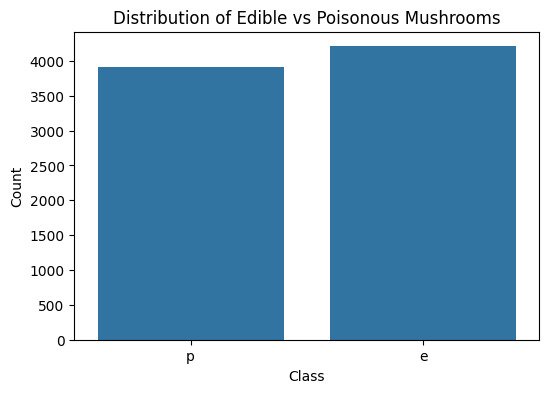

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df)
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

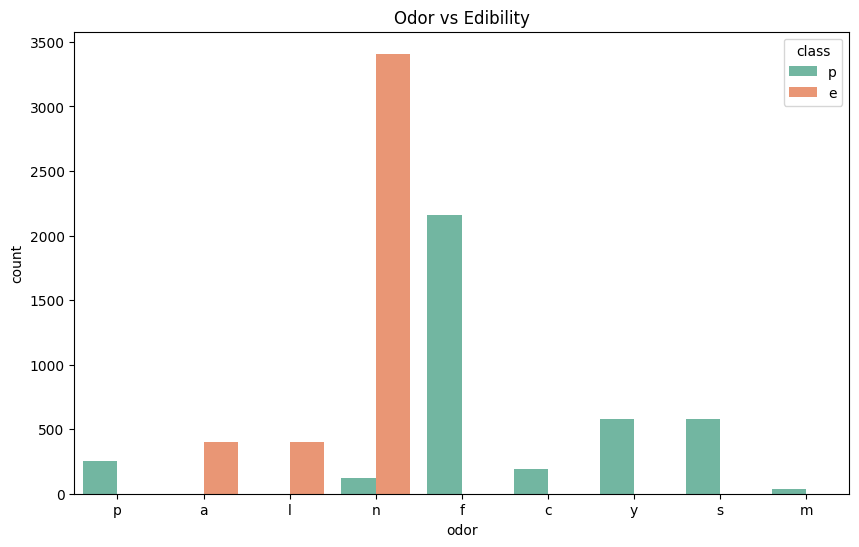

In [9]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="odor", hue="class", palette="Set2")
plt.title("Odor vs Edibility")
plt.show()


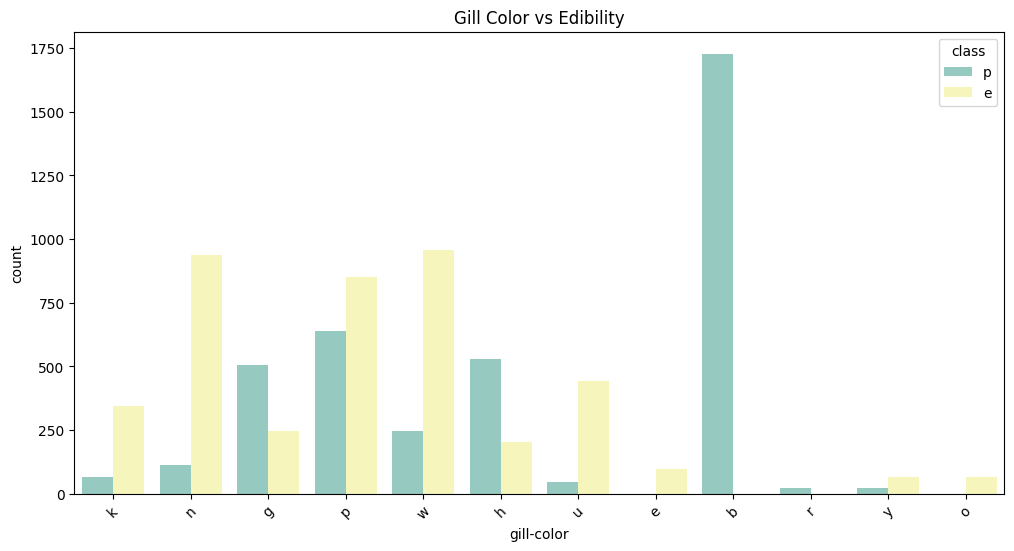

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="gill-color", hue="class", palette="Set3")
plt.title("Gill Color vs Edibility")
plt.xticks(rotation=45)
plt.show()


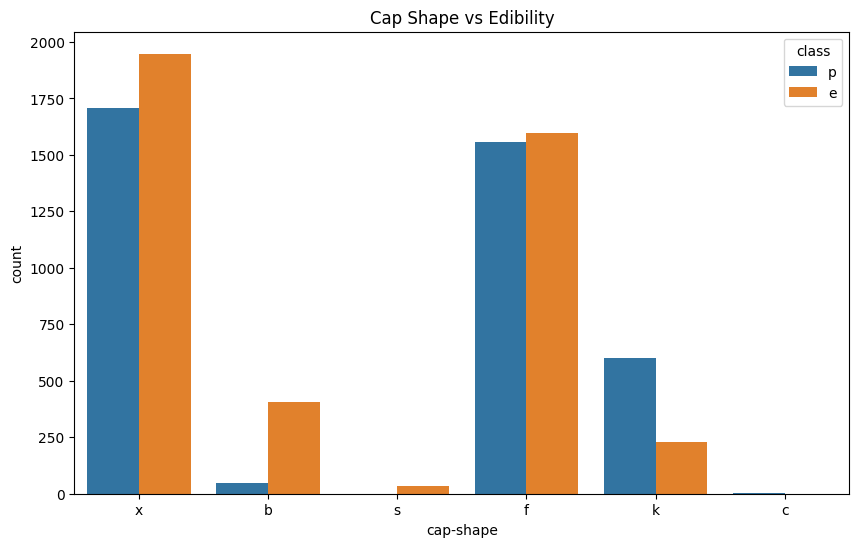

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="cap-shape", hue="class")
plt.title("Cap Shape vs Edibility")
plt.show()


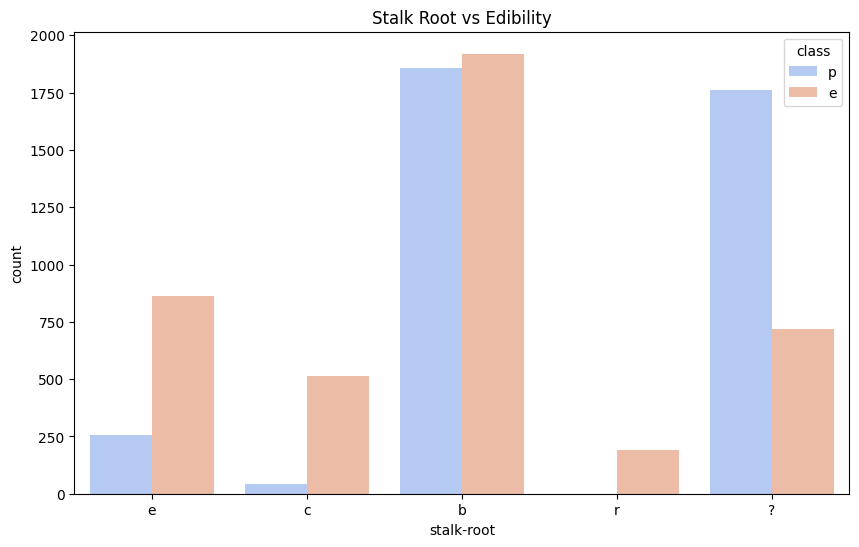

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="stalk-root", hue="class", palette="coolwarm")
plt.title("Stalk Root vs Edibility")
plt.show()


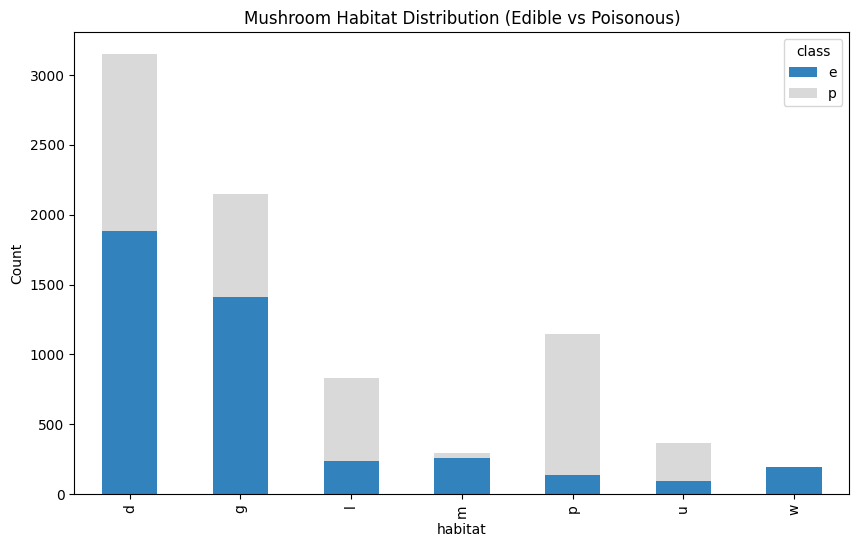

In [13]:
habitat_counts = df.groupby(["habitat", "class"]).size().unstack()

habitat_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20c")
plt.title("Mushroom Habitat Distribution (Edible vs Poisonous)")
plt.ylabel("Count")
plt.show()


In [14]:
df = df.drop(columns=['veil-type'], errors='ignore')

In [15]:
X = df.drop("class", axis=1)
y = df["class"] 

In [16]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder() 
y = le_y.fit_transform(df["class"])

In [17]:
encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

RANDOM FOREST:

In [19]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
rf_pred3 = rf.predict(X_test)

In [21]:

from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
accuracy_score(y_test, rf_pred3)

1.0

In [22]:
cf=classification_report(y_test, rf_pred3)
cf

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       842\n           1       1.00      1.00      1.00       783\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [23]:
p=precision_score(y_test, rf_pred3)
p

1.0

In [24]:
r=recall_score(y_test, rf_pred3)
r

1.0

In [25]:
f= f1_score(y_test, rf_pred3)
f

1.0

In [26]:
from sklearn.model_selection import cross_val_score
rf_acc = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
rf_acc

array([0.84246154, 1.        , 0.99876923, 1.        , 0.66502463])

In [27]:
final=rf_acc.mean()
final

np.float64(0.9012510799545282)

In [28]:
cm=confusion_matrix(y_test,rf_pred3)
cm

array([[842,   0],
       [  0, 783]])

LOGISTIC:

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

In [30]:
acc=accuracy_score(y_test, log_pred)
acc

0.9556923076923077

In [31]:
classification_report(y_test, log_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96       842\n           1       0.96      0.95      0.95       783\n\n    accuracy                           0.96      1625\n   macro avg       0.96      0.96      0.96      1625\nweighted avg       0.96      0.96      0.96      1625\n'

In [32]:
p=precision_score(y_test, log_pred)
p

0.9598965071151359

In [33]:
r=recall_score(y_test, log_pred)
r

0.9476372924648787

In [34]:
f1=f1_score(y_test, log_pred)
f1

0.9537275064267352

In [35]:
log_acc = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")
log_acc

array([0.64369231, 0.98338462, 0.87569231, 0.99815385, 0.6520936 ])

In [36]:
print(log_acc.mean())

0.830603334596438


In [37]:
cm=confusion_matrix(y_test,log_pred)
cm

array([[811,  31],
       [ 41, 742]])

GRADIENT:

In [38]:
from sklearn.ensemble import  GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [39]:
acc=accuracy_score(y_test, gb_pred)
acc

1.0

In [40]:
classification_report(y_test, gb_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       842\n           1       1.00      1.00      1.00       783\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [41]:
p= precision_score(y_test, gb_pred)
p

1.0

In [42]:
r=recall_score(y_test, gb_pred)
r

1.0

In [43]:
f=f1_score(y_test, gb_pred)
f

1.0

In [44]:
gr_acc = cross_val_score(gb, X, y, cv=5, scoring="accuracy")
gr_acc

array([0.84246154, 1.        , 0.99569231, 1.        , 0.74876847])

In [45]:
print(gr_acc.mean())

0.91738446381205


In [46]:
cm=confusion_matrix(y_test,gb_pred)
cm

array([[842,   0],
       [  0, 783]])

In [ ]:
data = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy (No CV)": [0.9557, 1.0000, 1.0000],
    "F1 Score": [0.9537, 1.0000, 1.0000],
    "Precision": [0.9599, 1.0000, 1.0000],
    "Recall": [0.9476, 1.0000, 1.0000],
    "Accuracy (With CV)": [0.8306, 0.9013, 0.9174]  # your CV accuracies
}


df = pd.DataFrame(data)


df = df.sort_values(by="Accuracy (With CV)", ascending=False).reset_index(drop=True)

df


,Model,Accuracy (No CV),F1 Score,Precision,Recall,Accuracy (With CV)
0,Gradient Boosting,1.0000,1.0000,1.0000,1.0000,0.9174
1,Random Forest,1.0000,1.0000,1.0000,1.0000,0.9013
2,Logistic Regression,0.9557,0.9537,0.9599,0.9476,0.8306


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


gb = GradientBoostingClassifier(random_state=42)


param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3, 4],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring="f1",   
    cv=5,
    n_jobs=-1,
   
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 1.0


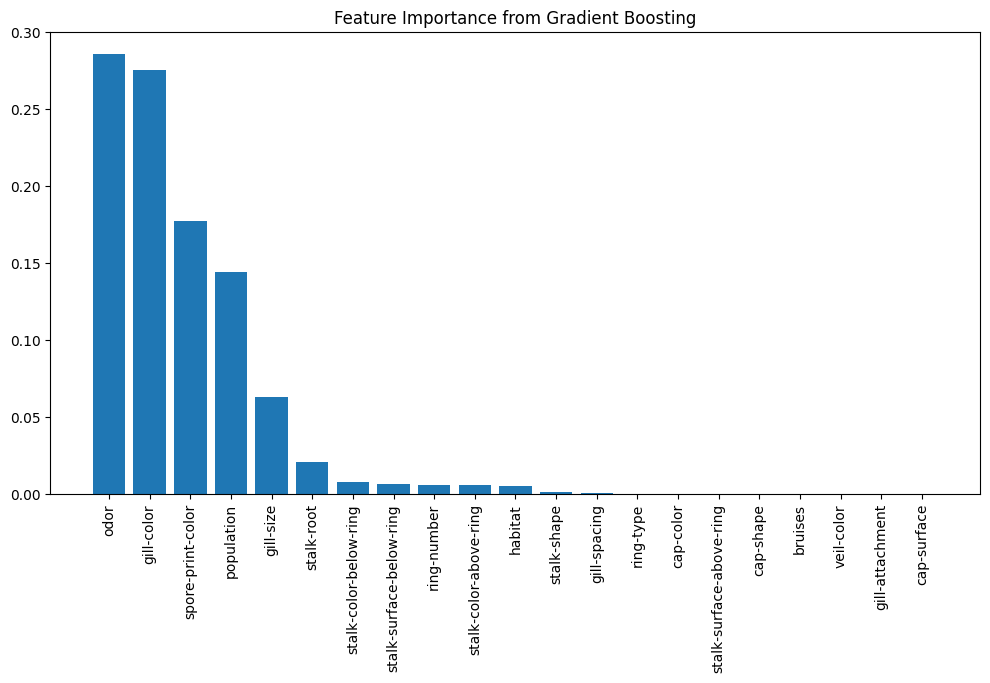

In [48]:
import numpy as np

importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.title("Feature Importance from Gradient Boosting")
plt.show()


In [49]:
import pickle


with open("mushroom_model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)


with open("label_encoders.pkl", "wb") as f:
    pickle.dump({
        "features": encoders,      
        "target": le_y,            
        "columns": X.columns.tolist()
    }, f)
